<a href="https://colab.research.google.com/github/babupallam/Supervised-Learning-Classification-Algorithms/blob/main/07_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

#### 1. **Introduction to Random Forest**
Random Forest is a popular and powerful ensemble learning algorithm used primarily for classification and regression tasks. It is a type of **bagging** technique, which builds multiple decision trees during training and outputs the mode (in classification) or mean (in regression) of the individual trees' predictions.

#### 2. **Understanding the Basics of Decision Trees**
Before diving into Random Forest, it's crucial to understand the basics of decision trees:
- **Decision Trees** are a type of supervised learning model used for both classification and regression. They split the data into subsets based on the value of input features, creating a tree-like structure where each internal node represents a "decision" based on a feature, each branch represents the outcome of that decision, and each leaf node represents a class label (in classification) or continuous value (in regression).
- The tree is constructed by selecting the feature that maximizes a criterion like **Gini impurity** or **entropy** (for classification), or **variance reduction** (for regression).

However, decision trees are prone to **overfitting**, especially when they are deep (i.e., they have many levels). This is where Random Forest comes into play, reducing overfitting by averaging multiple trees.

#### 3. **Random Forest: How It Works**
Random Forest mitigates the overfitting problem by creating a large number of decision trees and combining their results. Here's how it works:

1. **Bootstrapping and Bagging**:
   - The algorithm generates several subsets (bootstrap samples) from the original dataset by randomly sampling with replacement. This means some instances may be included multiple times in a subset, while others might not appear at all.
   - A decision tree is built on each of these subsets, resulting in a diverse set of trees.

2. **Feature Randomness**:
   - In addition to bootstrapping, Random Forest introduces another layer of randomness. At each split in the tree, a random subset of features is considered for splitting rather than using all available features. This further diversifies the trees and helps in reducing correlation between the individual trees.

3. **Aggregation**:
   - In the classification task, the final prediction is made by aggregating the predictions from all individual trees through majority voting (the class with the most votes is selected).
   - In regression tasks, the average of all tree outputs is taken as the final prediction.

#### 4. **Non-Linearity in Random Forest**
Random Forest is inherently capable of capturing non-linear relationships in data due to the following reasons:

- **Decision Boundaries**: Each decision tree in a Random Forest partitions the feature space into regions that may have complex, non-linear boundaries. Since the trees are not pruned, they can capture intricate patterns in the data.
- **Ensemble Effect**: By combining many trees, Random Forest leverages the power of multiple weak learners to create a strong overall model. The aggregation of these decision trees, each capturing different aspects of the data, leads to a model that can effectively handle non-linear relationships.

#### 5. **Advantages of Random Forest**
- **Reduced Overfitting**: The use of multiple trees and the randomization in feature selection help in reducing the overfitting that single decision trees are prone to.
- **Robustness**: Random Forest is robust to noise and outliers in the data.
- **High Accuracy**: It often achieves better accuracy than individual decision trees due to its ensemble nature.
- **Feature Importance**: Random Forest provides estimates of feature importance, helping in understanding which features are most influential in the prediction task.

#### 6. **Disadvantages of Random Forest**
- **Complexity**: The model can become computationally expensive and slow, especially with a large number of trees and features.
- **Interpretability**: While individual decision trees are easy to interpret, the ensemble nature of Random Forest makes it less interpretable.
- **Large Memory Consumption**: Storing many trees can require significant memory.

#### 7. **Tuning Random Forest**
To optimize the performance of a Random Forest, several hyperparameters can be tuned:

- **Number of Trees (`n_estimators`)**: The more trees, the better the performance (to a point), but also higher computational cost.
- **Number of Features (`max_features`)**: Determines the number of features to consider when looking for the best split.
- **Maximum Depth of Trees (`max_depth`)**: Limits the depth of the trees, controlling overfitting.
- **Minimum Samples Split (`min_samples_split`)**: The minimum number of samples required to split an internal node.
- **Minimum Samples per Leaf (`min_samples_leaf`)**: The minimum number of samples required to be at a leaf node.
- **Bootstrap**: Whether bootstrap samples are used when building trees. If `False`, all samples are used to build each tree.



# Demo of the model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading data set

from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
# Initialize the model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [4]:
# Predict the labels of the test set
y_pred = rf_model.predict(X_test)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



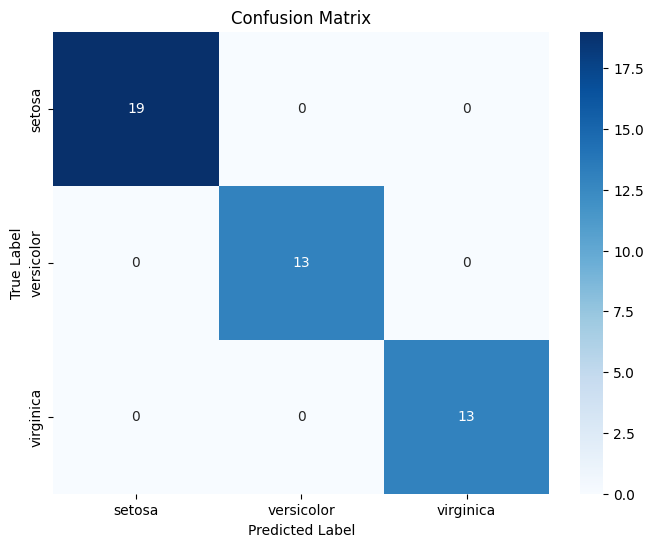

In [6]:
# Evaluation of the model

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


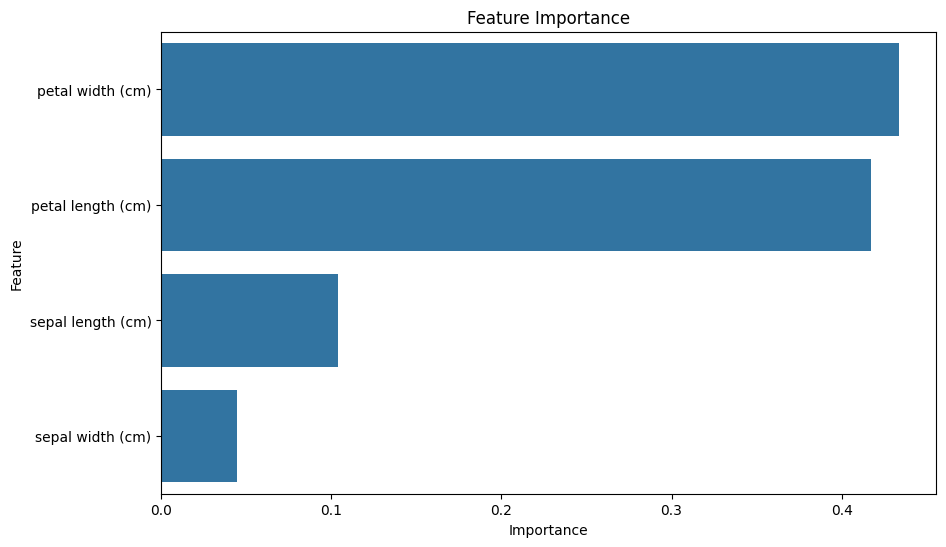

In [8]:
# Get feature importance

# One of the advantages of Random Forest is its ability to measure feature importance.


importances = rf_model.feature_importances_
feature_names = iris.feature_names

# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title('Feature Importance')
plt.show()


# Applications of Random Forest

### 1. **Healthcare - Disease Diagnosis**
   - **Example**: Random Forest can be used to predict whether a patient has a specific disease based on their medical records, lab test results, and other relevant features.
   - **Application**: Predicting the presence of diseases like diabetes, heart disease, or cancer by analyzing patient data and identifying important risk factors.

### 2. **Finance - Credit Scoring**
   - **Example**: Financial institutions use Random Forest to assess the creditworthiness of individuals applying for loans.
   - **Application**: Predicting whether a customer will default on a loan based on their credit history, income, employment status, and other financial indicators.

### 3. **Marketing - Customer Segmentation**
   - **Example**: Businesses use Random Forest to segment their customers into different groups based on purchasing behavior, demographics, and preferences.
   - **Application**: Targeting marketing campaigns more effectively by understanding different customer segments and their likely responses to promotions.

### 4. **E-commerce - Recommendation Systems**
   - **Example**: Random Forest can be used to recommend products to customers based on their browsing history, purchase history, and ratings.
   - **Application**: Enhancing customer experience by suggesting products that are likely to be of interest, thereby increasing sales and customer engagement.

### 5. **Fraud Detection - Banking**
   - **Example**: Banks and financial services use Random Forest models to detect fraudulent transactions.
   - **Application**: Identifying unusual patterns in transaction data that may indicate fraudulent activity, such as credit card fraud or identity theft.

### 6. **Bioinformatics - Gene Selection**
   - **Example**: In genomics, Random Forest is used to identify the most significant genes that are associated with specific traits or diseases.
   - **Application**: Analyzing gene expression data to select important genes that may contribute to diseases like cancer, aiding in the development of personalized medicine.

### 7. **Energy - Load Forecasting**
   - **Example**: Energy companies use Random Forest to predict future energy consumption based on historical usage data, weather conditions, and other factors.
   - **Application**: Optimizing energy production and distribution by accurately forecasting energy demand, which helps in reducing costs and improving efficiency.

### 8. **Environmental Science - Species Distribution**
   - **Example**: Ecologists use Random Forest to predict the distribution of species based on environmental variables like temperature, precipitation, and land cover.
   - **Application**: Conservation efforts are improved by identifying critical habitats and understanding how species distributions might change due to climate change.

### 9. **Retail - Inventory Management**
   - **Example**: Retailers use Random Forest to predict sales and manage inventory levels, reducing both stockouts and excess inventory.
   - **Application**: Optimizing inventory levels by forecasting demand for different products, which helps in maintaining the right stock levels and improving profitability.

### 10. **Human Resources - Employee Attrition Prediction**
   - **Example**: Companies use Random Forest to predict whether an employee is likely to leave the company based on their job satisfaction, salary, work-life balance, and other factors.
   - **Application**: Reducing turnover by identifying at-risk employees and implementing retention strategies, such as offering promotions or addressing job dissatisfaction.

# Application 1: predicting employee attrition

In [9]:
!pip install pandas scikit-learn matplotlib seaborn


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a synthetic dataset
np.random.seed(42)
n_samples = 1000

# Simulate some features
data = pd.DataFrame({
    'Age': np.random.randint(20, 60, n_samples),
    'MonthlyIncome': np.random.randint(3000, 15000, n_samples),
    'JobSatisfaction': np.random.randint(1, 5, n_samples),
    'WorkLifeBalance': np.random.randint(1, 5, n_samples),
    'YearsAtCompany': np.random.randint(1, 40, n_samples),
    'OverTime': np.random.randint(0, 2, n_samples),  # 0 = No, 1 = Yes
    'Attrition': np.random.randint(0, 2, n_samples)  # 0 = No, 1 = Yes
})

# Display the first few rows of the dataset
data.head()


,Age,MonthlyIncome,JobSatisfaction,WorkLifeBalance,YearsAtCompany,OverTime,Attrition
0,58,14725,3,3,11,1,0
1,48,14559,4,4,17,1,1
2,34,6368,2,4,14,0,0
3,27,6797,2,1,27,0,0
4,40,4792,2,4,18,0,1


In [11]:
# splitting the data set

# Features and target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

No Attrition       0.46      0.45      0.45       141
   Attrition       0.52      0.54      0.53       159

    accuracy                           0.50       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.50      0.50      0.50       300



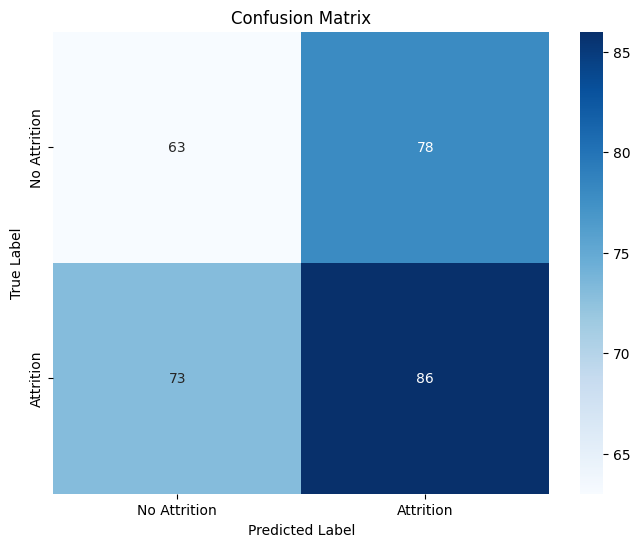

In [13]:
# making predictions

# Predict the labels of the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=["No Attrition", "Attrition"])
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


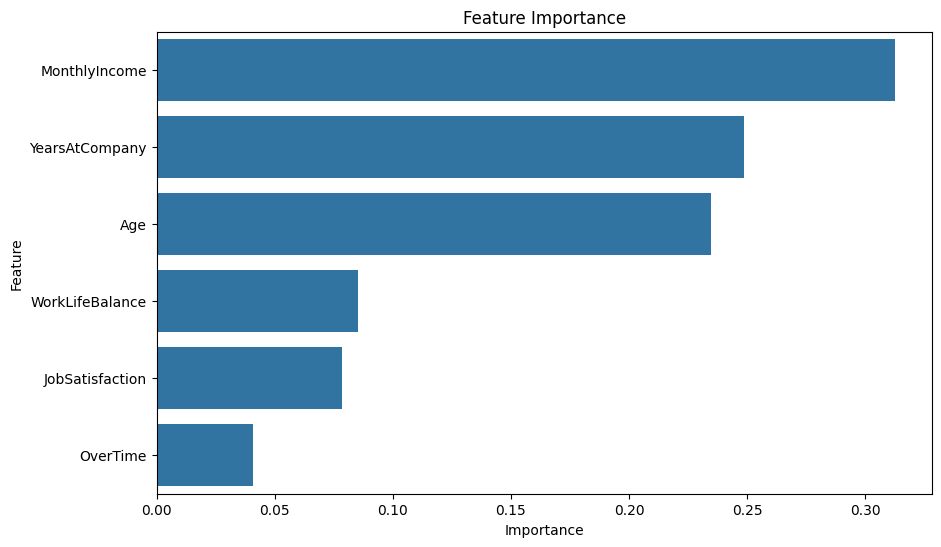

In [14]:
# feature predictions

# Get feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title('Feature Importance')
plt.show()


##Example Input Data
Suppose we have an employee with the following characteristics:

Age: 35 years

MonthlyIncome: $5,500

JobSatisfaction: 3 (on a scale of 1 to 4, where 1 = Low, 4 = Very High)

WorkLifeBalance: 2 (on a scale of 1 to 4, where 1 = Bad, 4 = Excellent)

YearsAtCompany: 7 years

OverTime: 1 (1 = Yes, 0 = No)

In [15]:
import pandas as pd

# Example input for a single employee
example_input = pd.DataFrame({
    'Age': [35],
    'MonthlyIncome': [5500],
    'JobSatisfaction': [3],
    'WorkLifeBalance': [2],
    'YearsAtCompany': [7],
    'OverTime': [1]
})

# Display the example input
example_input


,Age,MonthlyIncome,JobSatisfaction,WorkLifeBalance,YearsAtCompany,OverTime
0,35,5500,3,2,7,1


In [17]:
# Ouput

# Assuming rf_model is already trained

# Predict whether the employee will leave or not
prediction = rf_model.predict(example_input)

# Convert the prediction to a readable format
prediction_label = "Attrition" if prediction[0] == 1 else "No Attrition"
print(f"Prediction: {prediction_label}")

# If the model predicts 1 (Attrition), it means the model predicts that the employee is likely to leave the company.

# If the model predicts 0 (No Attrition), it means the model predicts that the employee is likely to stay with the company.


Prediction: Attrition
